In [38]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [94]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies=pd.read_csv("C:\\Users\\KIIT\\Downloads\\kaggle\\movies.csv")
credits=pd.read_csv("C:\\Users\\KIIT\\Downloads\\kaggle\\credits.csv")
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.rename({'movie_id':'id'},axis=1,inplace=True)

In [5]:
movies=movies.merge(credits,on='id')


# data are in json format, extracting useful attributes only

In [6]:
# extracting names from json
def extract_names(json_str):
  
    try:
        json_list = json.loads(json_str)
        names = ', '.join([d['name'] for d in json_list])
    except json.JSONDecodeError as e:
        return str(e)
    return names

# Apply the function to the json column
movies['genres']= movies['genres'].apply(extract_names).str.replace(" ",'')
movies['spoken_languages']=movies['spoken_languages'].apply(extract_names).str.strip("").str.replace(" ",'')
movies['production_companies']=movies['production_companies'].apply(extract_names).str.strip("").str.replace(" ",'')
movies['production_countries']=movies['production_countries'].apply(extract_names).str.strip("").str.replace(" ",'')
movies['keywords']=movies['keywords'].apply(extract_names).str.strip("").str.replace(" ",'')


In [7]:
movies


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",http://www.avatarmovie.com/,19995,"cultureclash,future,spacewar,spacecolony,socie...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...",...,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drugabuse,exoticisland,eastindiatradingc...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,basedonnovel,secretagent,sequel,mi6,britis...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"ColumbiaPictures,Danjaq,B24",...,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dccomics,crimefighter,terrorist,secretidentity...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",...,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"Action,Adventure,ScienceFiction",http://movies.disney.com/john-carter,49529,"basedonnovel,mars,medallion,spacetravel,prince...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,WaltDisneyPictures,...,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"unitedstates–mexicobarrier,legs,arms,paperknif...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,ColumbiaPictures,...,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"Comedy,Romance",NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,...,85.0,,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"Comedy,Drama,Romance,TVMovie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date,loveatfirstsight,narration,investigation,...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"FrontStreetPictures,MuseEntertainmentEnterprises",...,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,0,,http://shan

In [8]:
#movies.drop(columns=['genres','production_companies','spoken_languages'],axis=1,inplace=True)
#movies.drop(columns=['production_countries'],axis=1,inplace=True)
movies.drop(columns=['homepage','title_y'],axis=1,inplace=True)




In [9]:
# extracting name from  cast
movies['cast']=movies.cast.apply(extract_names).str.replace(" ",'')




In [10]:
movies.cast



0       SamWorthington,ZoeSaldana,SigourneyWeaver,Step...
1       JohnnyDepp,OrlandoBloom,KeiraKnightley,Stellan...
2       DanielCraig,ChristophWaltz,LéaSeydoux,RalphFie...
3       ChristianBale,MichaelCaine,GaryOldman,AnneHath...
4       TaylorKitsch,LynnCollins,SamanthaMorton,Willem...
                              ...                        
4798    CarlosGallardo,JaimedeHoyos,PeterMarquardt,Rei...
4799    EdwardBurns,KerryBishé,MarshaDietlein,CaitlinF...
4800    EricMabius,KristinBooth,CrystalLowe,GeoffGusta...
4801    DanielHenney,ElizaCoupe,BillPaxton,AlanRuck,Zh...
4802    DrewBarrymore,BrianHerzlinger,CoreyFeldman,Eri...
Name: cast, Length: 4803, dtype: object

In [11]:
# extracting features from crew 
def extract_cast(json_str):
    try:
        json_list = json.loads(json_str)
        names=[]
        #names = ', '.join([d['name'] for d in json_list])
        for d in json_list:
            if d['department']=='Directing':
                names.append(d['name'])
        names = ','.join(names)

                
    except json.JSONDecodeError as e:
        return str(e)
    return names

movies['directing']=movies['crew'].apply(extract_cast).str.replace(" ",'')



In [12]:
movies.directing



0                                            JamesCameron
1       GoreVerbinski,PamelaAlch,SharronReynolds,Karen...
2       SamMendes,Jayne-AnnTenggren,NicolettaMani,Susi...
3       ChristopherNolan,SteveGehrke,MatthewReedy,SidK...
4       AndrewStanton,AnniePenn,TommyGormley,BenDixon,...
                              ...                        
4798                                      RobertRodriguez
4799                                          EdwardBurns
4800                                           ScottSmith
4801                                           DanielHsia
4802                    BrianHerzlinger,JonGunn,BrettWinn
Name: directing, Length: 4803, dtype: object

In [66]:
movies.select_dtypes('number')

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238
4799,9000,0.642552,0,85.0,5.9,5
4800,0,1.444476,0,120.0,7.0,6
4801,0,0.857008,0,98.0,5.7,7


In [13]:
movies.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title_x                   0
vote_average              0
vote_count                0
cast                      0
crew                      0
directing                 0
dtype: int64

In [14]:
movies.drop('tagline',axis=1,inplace=True)


In [15]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
directing               0
dtype: int64

In [16]:
movies.dropna(inplace=True)

In [17]:
# extracting year,month and day from release year
movies['release_year']=pd.to_datetime(movies['release_date']).dt.year.astype('int')
movies['release_month']=pd.to_datetime(movies['release_date']).dt.month.astype('int')
movies['release_day']=pd.to_datetime(movies['release_date']).dt.weekday.astype('int')


In [31]:
movies['tag']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['directing']
movies.tag[0]





'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.Action,Adventure,Fantasy,ScienceFictioncultureclash,future,spacewar,spacecolony,society,spacetravel,futuristic,romance,space,alien,tribe,alienplanet,cgi,marine,soldier,battle,loveaffair,antiwar,powerrelations,mindandsoul,3dSamWorthington,ZoeSaldana,SigourneyWeaver,StephenLang,MichelleRodriguez,GiovanniRibisi,JoelDavidMoore,CCHPounder,WesStudi,LazAlonso,DileepRao,MattGerald,SeanAnthonyMoran,JasonWhyte,ScottLawrence,KellyKilgour,JamesPatrickPitt,SeanPatrickMurphy,PeterDillon,KevinDorman,KelsonHenderson,DavidVanHorn,JacobTomuri,MichaelBlain-Rozgay,JonCurry,LukeHawker,WoodySchultz,PeterMensah,SoniaYee,JahnelCurfman,IlramChoi,KylaWarren,LisaRoumain,DebraWilson,ChrisMala,TaylorKibby,JodieLandau,JulieLamm,CullenB.Madden,JosephBradyMadden,FrankieTorres,AustinWilson,SaraWilson,TamicaWashington-Miller,LucyBriant,NathanMeis

In [55]:
data_year=movies.groupby('release_year')['budget'].sum().nlargest(10)


<Axes: title={'center': 'top 10 budget '}, xlabel='release_year'>

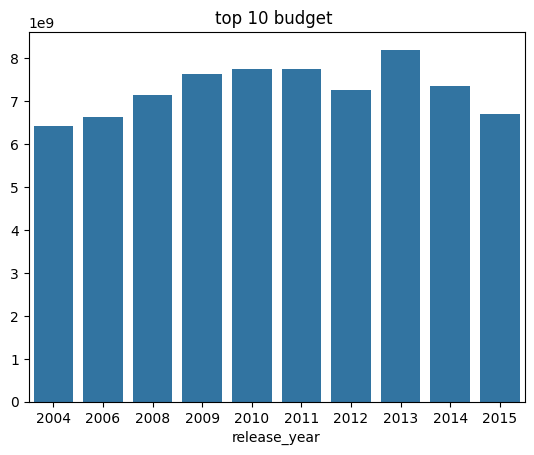

In [56]:
plt.title('top 10 budget ')
sns.barplot(x=data_year.index,y=data_year.values,)

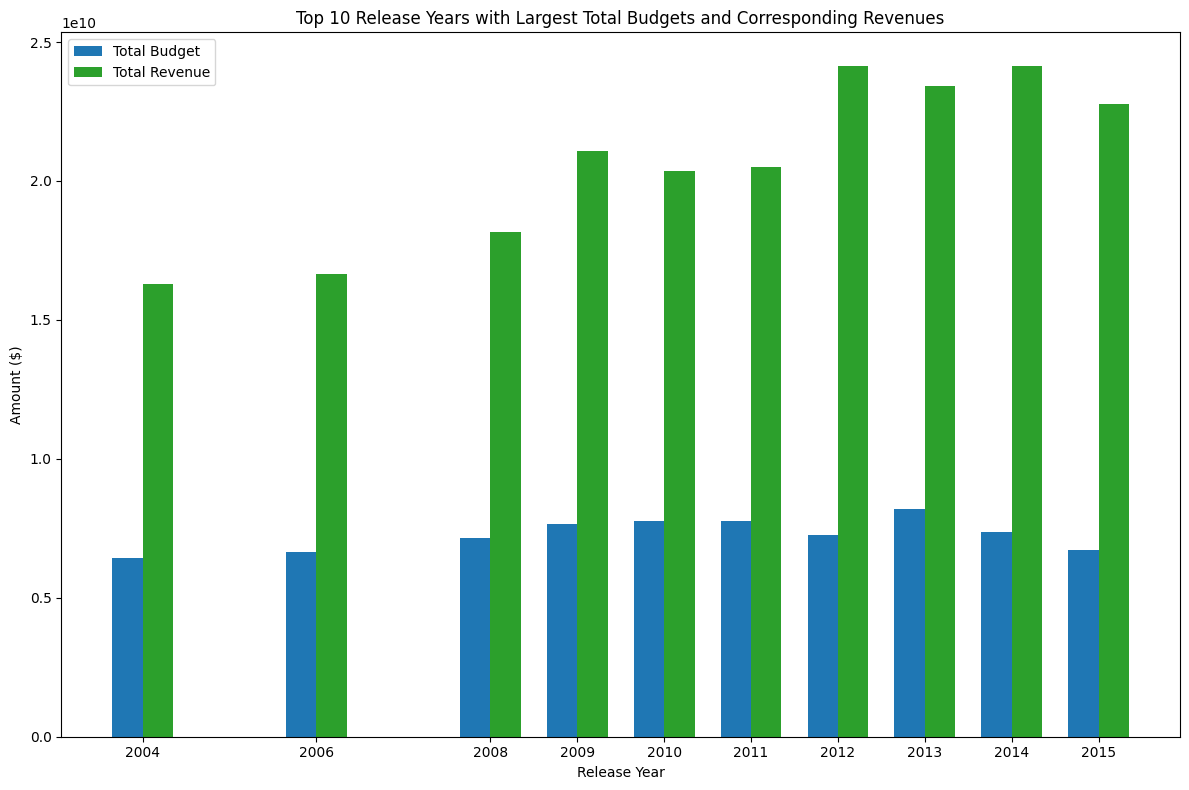

In [57]:


# Assuming movies DataFrame already exists with 'release_year', 'budget', and 'revenue' columns
# Example DataFrame structure
# movies = pd.DataFrame({
#     'release_year': [year1, year2, ...],
#     'budget': [budget1, budget2, ...],
#     'revenue': [revenue1, revenue2, ...]
# })

# Group by 'release_year' and sum the 'budget' and 'revenue'
grouped = movies.groupby('release_year').agg({'budget': 'sum', 'revenue': 'sum'})

# Get the top 10 release years with the largest total budgets
top_10_budgets = grouped['budget'].nlargest(10)

# Get the corresponding revenues for the top 10 budget years
top_10_revenues = grouped.loc[top_10_budgets.index, 'revenue']

# Plot the results as grouped bars
fig, ax = plt.subplots(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.35
index = top_10_budgets.index

# Plot budgets
bars1 = ax.bar(index - bar_width/2, top_10_budgets, bar_width, label='Total Budget', color='tab:blue')

# Plot revenues
bars2 = ax.bar(index + bar_width/2, top_10_revenues, bar_width, label='Total Revenue', color='tab:green')

# Set labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Amount ($)')
ax.set_title('Top 10 Release Years with Largest Total Budgets and Corresponding Revenues')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


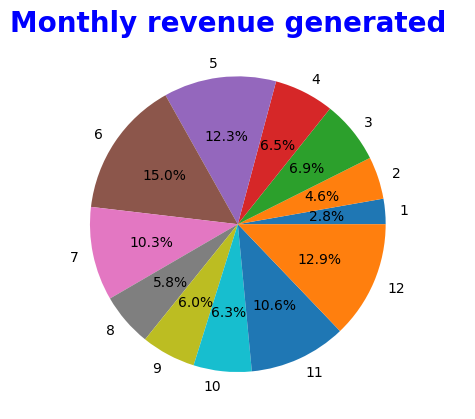

In [170]:
#release month and movie
data_month=movies.groupby('release_month')['revenue'].sum()
plt.title("Monthly revenue generated  ",color='blue',fontweight='bold',fontsize='20')
plt.pie(x=data_month.values,labels=data_month.index,autopct='%1.1f%%')

plt.show()

In [174]:
# calculating profit
movies['margin']=movies['revenue']-movies['budget']


In [180]:
# profit and calculation 
data_profit=movies[movies.margin >0]
data_profit


,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,vote_average,vote_count,title_y,cast,crew,directing,release_year,release_month,release_day,margin
0,237000000,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,...,7.2,11800,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,2009,12,3,2550965087
1,300000000,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,...,6.9,4500,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Gore Verbinski,Pamela Alch,Sharron Reynolds,Ka...",2007,5,5,661000000
2,245000000,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,...,6.3,4466,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","Sam Mendes,Jayne-Ann Tenggren,Nicoletta Mani,S...",2015,10,0,635674609
3,250000000,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,...,7.6,9106,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","Christopher Nolan,Steve Gehrke,Matthew Reedy,S...",2012,7,0,834939099
4,260000000,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,...,6.1,2124,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Andrew Stanton,Annie Penn,Tommy Gormley,Ben Di...",2012,3,2,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0,"Drama, Comedy",mumblecore,en,Funny Ha Ha,"Unsure of what to do next, 23-year-old Marnie ...",0.362633,,United States of America,2002-09-20,...,6.3,8,Funny Ha Ha,"Kate Dollenmayer, Mark Herlehy, Christian Rudd...","[{""credit_id"": ""52fe45309251416c9102a535"", ""de...",Andrew Bujalski,2002,9,4,76901
4788,12000,"Horror, Comedy, Crime","gay, trailer park, pop culture, drug dealer, h...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,Dreamland Productions,United States of America,1972-03-12,...,6.2,110,Pink Flamingos,"Divine, David Lochary, Mary Vivian Pearce, Min...","[{""credit_id"": ""52fe426bc3a36847f801d203"", ""de...",John Waters,1972,3,6,5988000
4792,20000,"Crime, Horror, Mystery, Thriller","japan, prostitute, hotel, based on novel, hall...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,Japan,1997-11-06,...,7.4,63,Cure,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,...","[{""credit_id"": ""52fe45cc9251416c9103eb7b"", ""de...",Kiyoshi Kurosawa,1997,11,3,79000
4796,7000,"Science Fiction, Drama, Thriller","distrust, garage, identity crisis, time travel...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,Thinkfilm,United States of America,2004-10-08,...,6.9,658,Primer,"Shane Carruth, David Sullivan, Casey Gooden

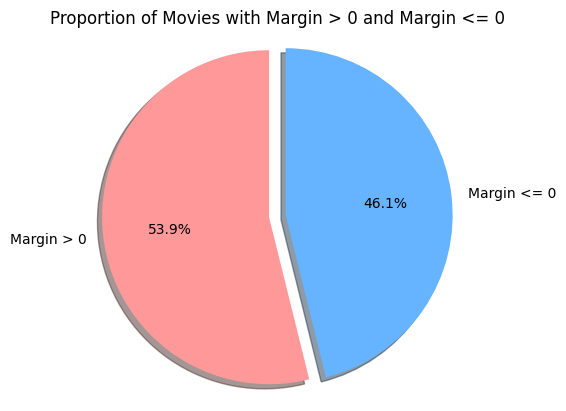

In [182]:
# Count the number of movies with margin > 0 and margin <= 0
positive_margin_count = movies[movies['margin'] > 0].shape[0]
non_positive_margin_count = movies[movies['margin'] <= 0].shape[0]

# Data to plot
labels = ['Margin > 0', 'Margin <= 0']
sizes = [positive_margin_count, non_positive_margin_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the first slice (Margin > 0)

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Movies with Margin > 0 and Margin <= 0')
plt.show()


# creating new df 


In [32]:
new_df=movies[['id','original_title','tag']]
# converting into lower
new_df['tag']=new_df['tag'].apply(lambda x: x.lower())
new_df



C:\Users\KIIT\AppData\Local\Temp\ipykernel_15400\2958352195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x: x.lower())


,id,original_title,tag
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4798,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4799,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4800,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [39]:
#  using  count vectorizer  
cv=CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_df['tag']).toarray()
vectors


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zoo', 'zooeydeschanel', 'zoëkravitz'],
      dtype=object)

In [48]:
# use stemmer for getting words like [love,loving,loved]-loveimport nltk
!pip install nltk

In [50]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [51]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return ''.join(y)


In [55]:
new_df['tag']=new_df['tag'].apply(stem)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15400\599176683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(stem)


In [56]:
new_df


,id,original_title,tag
0,19995,Avatar,"inthe22ndcentury,aparaplegmarinisdispatchtothe..."
1,285,Pirates of the Caribbean: At World's End,"captainbarbossa,longbelievtobedead,hacomebackt..."
2,206647,Spectre,acrypticmessagfrombond’pastsendhimonatrailtoun...
3,49026,The Dark Knight Rises,"followthedeathofdistrictattorneyharveydent,bat..."
4,49529,John Carter,"johncarterisawar-weary,formermilitaricaptainwh..."
...,...,...,...
4798,9367,El Mariachi,elmariachijustwanttoplayhiguitarandcarrionthef...
4799,72766,Newlyweds,anewlywcouple'honeymoonisupendbythearrivofthei...
4800,231617,"Signed, Sealed, Delivered","""signed,sealed,delivered""introducadedicquartet..."
4801,126186,Shanghai Calling,whenambitinewyorkattorneysamissenttoshanghaion...


In [57]:
# calculating cosine distances
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [59]:
similarity[0]

array([1.        , 0.05129892, 0.05564149, ..., 0.02503131, 0.0270369 ,
       0.        ])

# building recommendation engine

In [88]:

def recommend(movie_name):
    index=new_df[new_df['original_title']== movie_name].index[0]
    distances=similarity[index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
   

    for i in movies_list:
        print(new_df.iloc[i[0]].original_title)

    

In [93]:
try:
    recommend('Avatar')
except Exception as e:
    print('movie not found')



Aliens vs Predator: Requiem
Battle: Los Angeles
Lifeforce
Falcon Rising
Edge of Tomorrow
